In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
rem_cols = df[['Time','Amount']]
stats = rem_cols.describe().T
stats['Skewness'] = rem_cols.skew()
stats

,count,mean,std,min,25%,50%,75%,max,Skewness
Time,284807.0,94813.859575,47488.145955,0.0,54201.5,84692.0,139320.500,172792.00,-0.035568
Amount,284807.0,88.349619,250.120109,0.0,5.6,22.0,77.165,25691.16,16.977724


Fraut percentage is: 0.1727485630620034


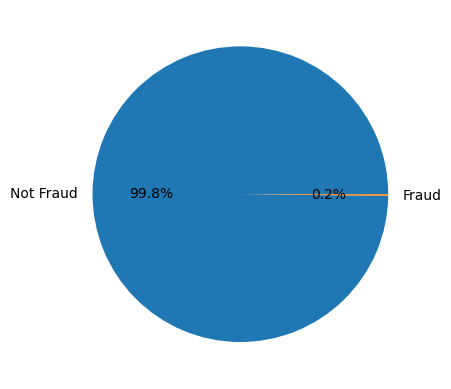

In [ ]:
#Pie chart for class distribution
values = df['Class'].value_counts()
perc = df['Class'].value_counts(normalize=True)*100
print(f"Fraut percentage is: {perc[1]}")
plt.pie(values,labels=['Not Fraud','Fraud'],autopct='%1.1f%%')
plt.show()

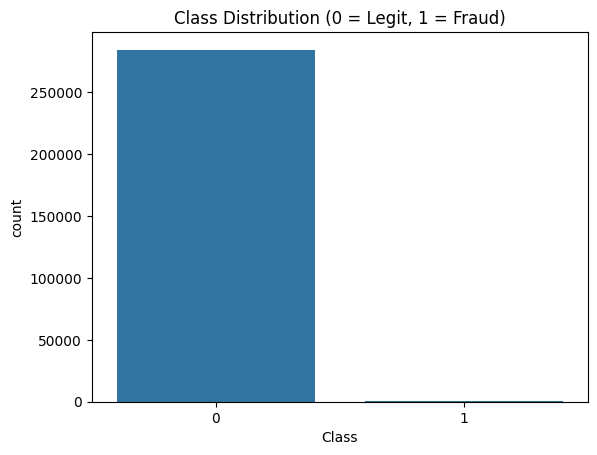

In [ ]:
# Barplot for class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

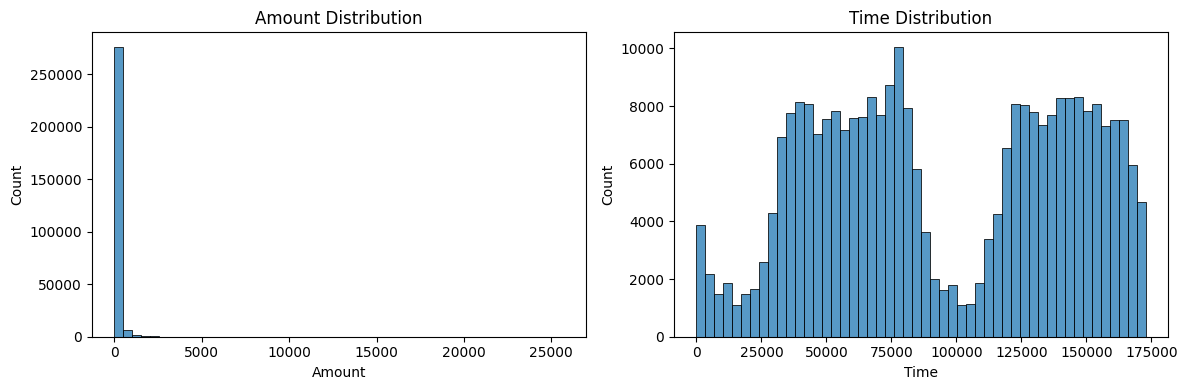

In [ ]:
# Distribution of Amount and Time
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df, x="Amount", bins=50, ax=axes[0])
axes[0].set_title("Amount Distribution")

sns.histplot(data=df, x="Time", bins=50, ax=axes[1])
axes[1].set_title("Time Distribution")

plt.tight_layout()
plt.show()

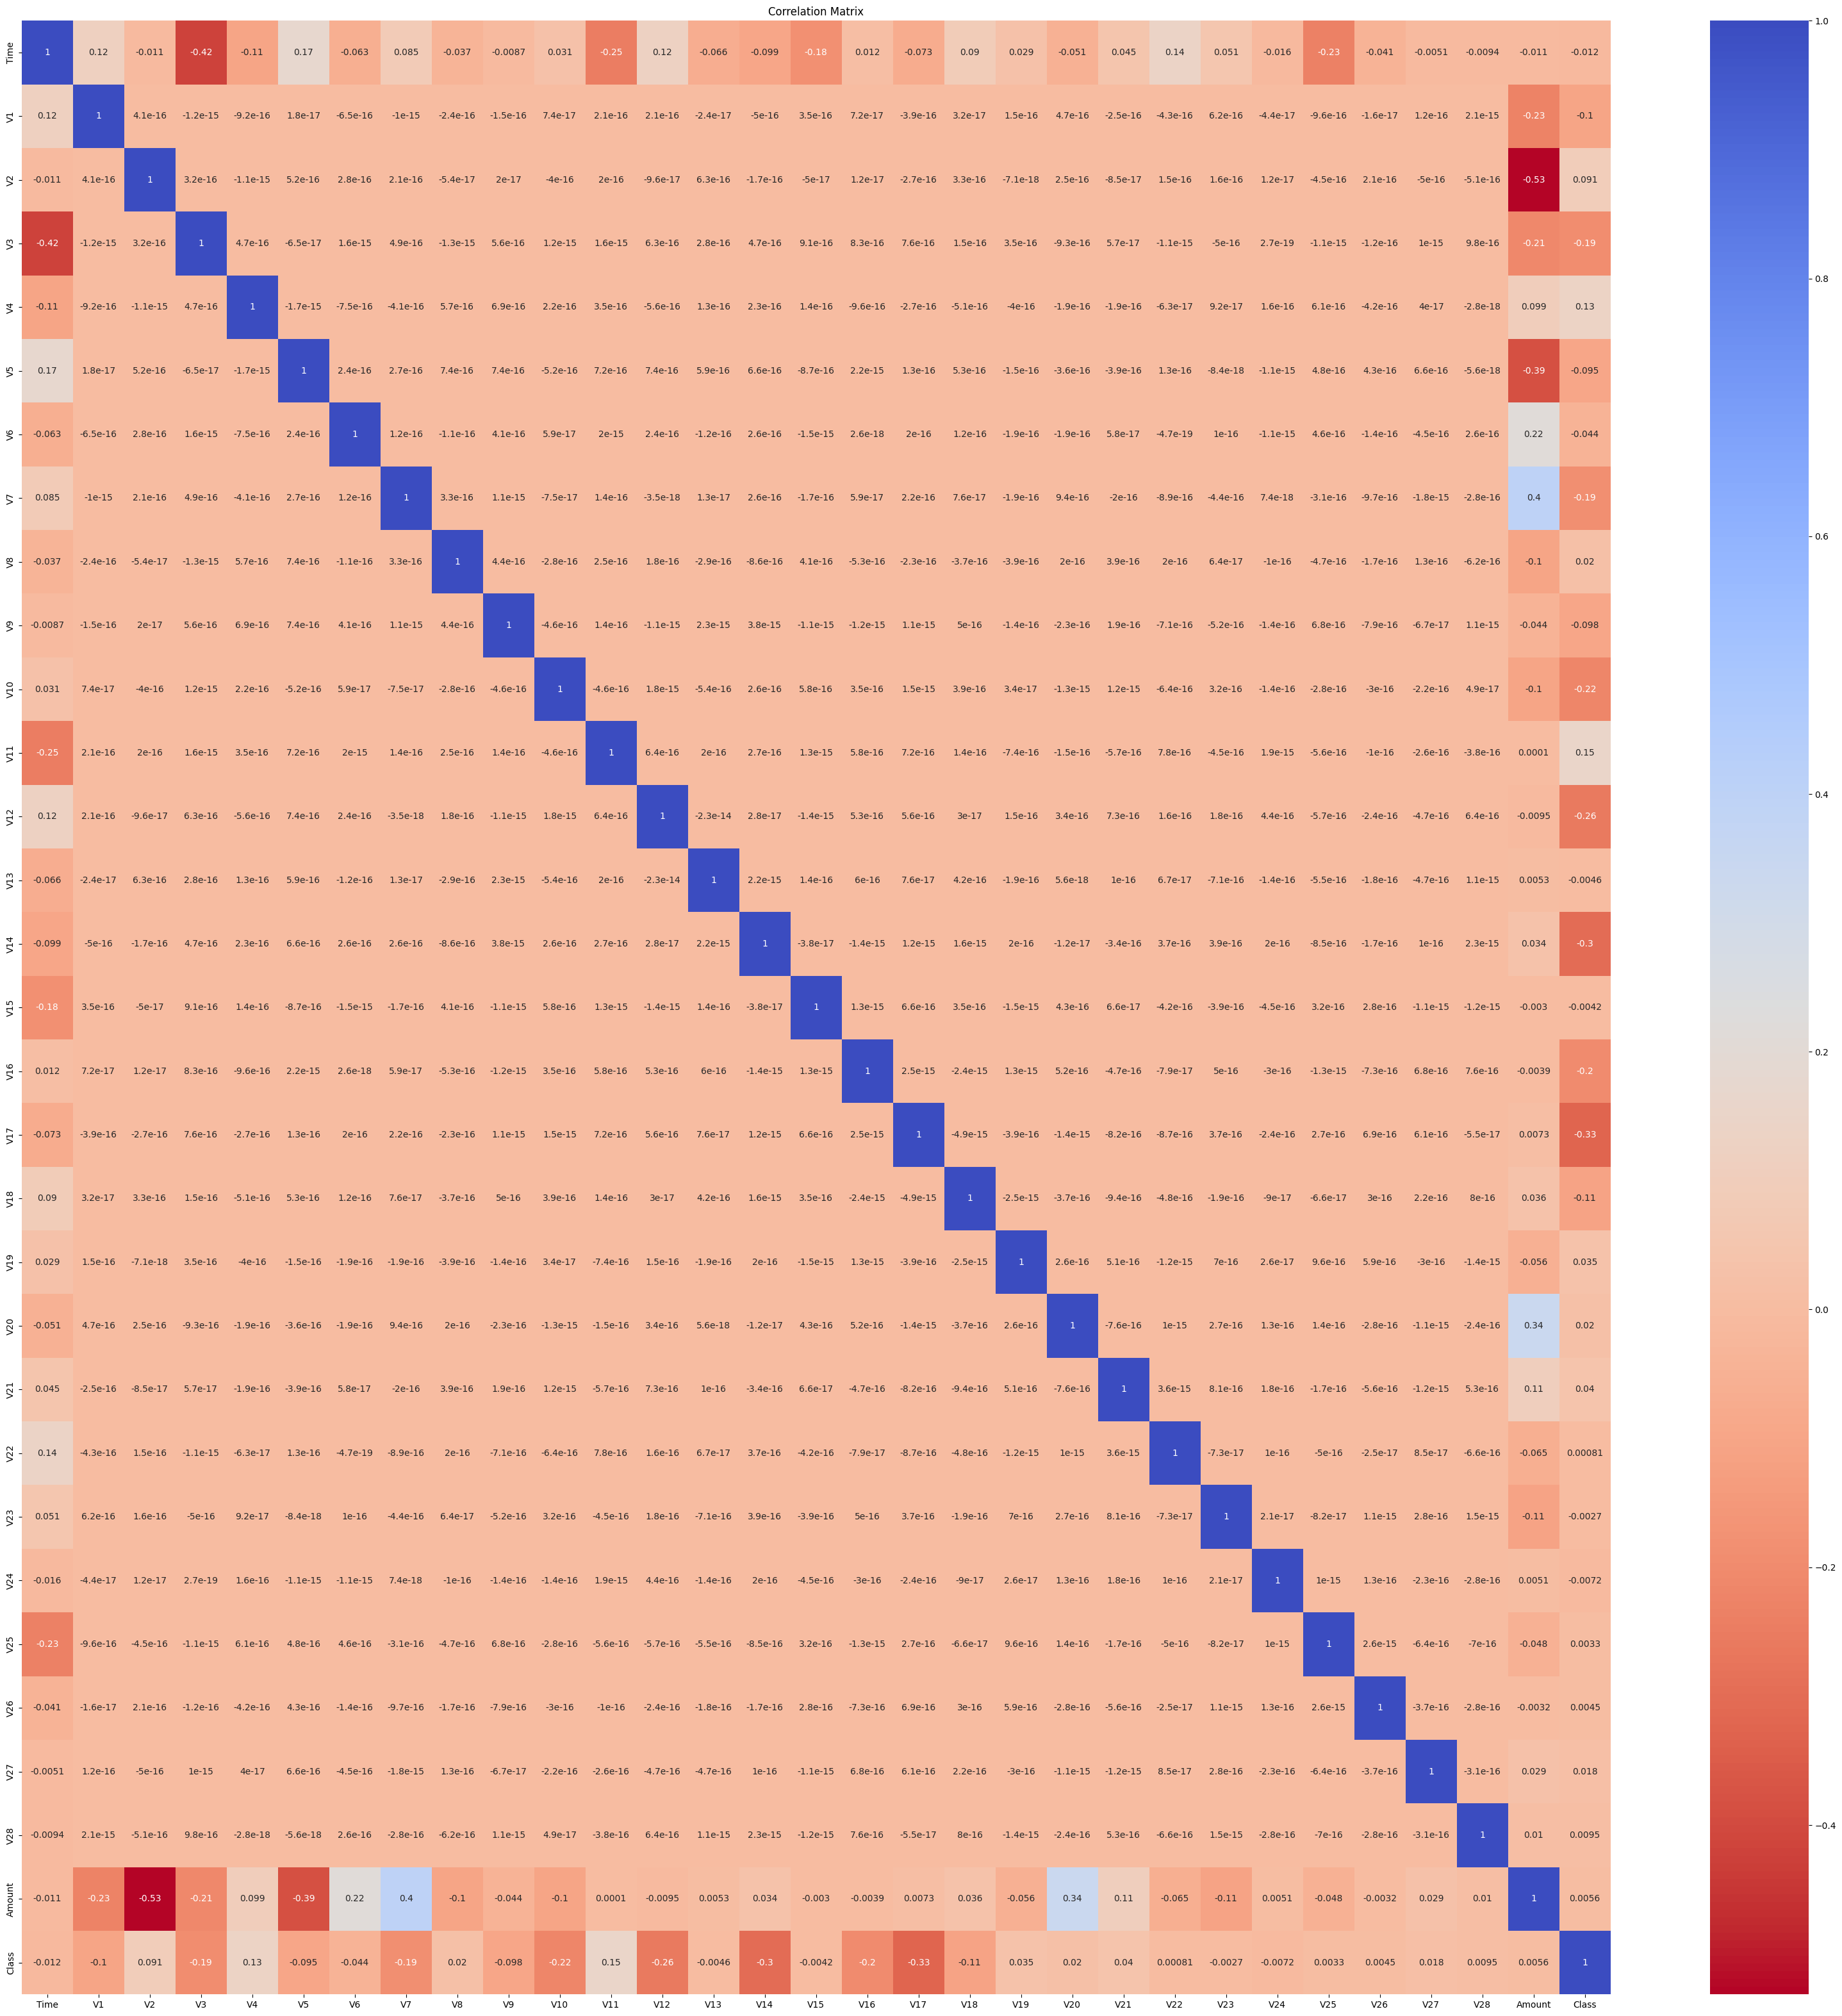

In [ ]:
# Compute correlation
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(40,40))
sns.heatmap(corr_matrix, cmap="coolwarm_r", annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
import joblib

df_copy = df.copy()

scaler_amount = RobustScaler()
scaler_time = RobustScaler()

df_copy['scaled_amount'] = scaler_amount.fit_transform(df_copy[['Amount']])
df_copy['scaled_time'] = scaler_time.fit_transform(df_copy[['Time']])

df_copy.drop(['Amount', 'Time'], axis=1, inplace=True)

scaled_amount = df_copy.pop('scaled_amount')
scaled_time = df_copy.pop('scaled_time')
df_copy.insert(0, 'scaled_amount', scaled_amount)
df_copy.insert(1, 'scaled_time', scaled_time)

joblib.dump(scaler_amount, 'scaler_amount.pkl')
joblib.dump(scaler_time, 'scaler_time.pkl')

df_copy.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df_copy.drop('Class', axis=1)
y = df_copy['Class']

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Check class balance in splits
print(y_train.value_counts(normalize=True) * 100)
print(y_test.value_counts(normalize=True) * 100)

Class
0    99.827451
1     0.172549
Name: proportion, dtype: float64
Class
0    99.826785
1     0.173215
Name: proportion, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

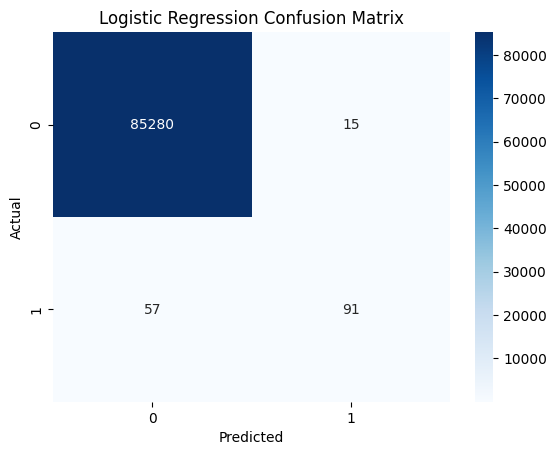

              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     85295
           1     0.8585    0.6149    0.7165       148

    accuracy                         0.9992     85443
   macro avg     0.9289    0.8073    0.8581     85443
weighted avg     0.9991    0.9992    0.9991     85443

ROC-AUC Score: 0.9576


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_lr, digits=4))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob_lr)
print(f"ROC-AUC Score: {roc_auc:.4f}")


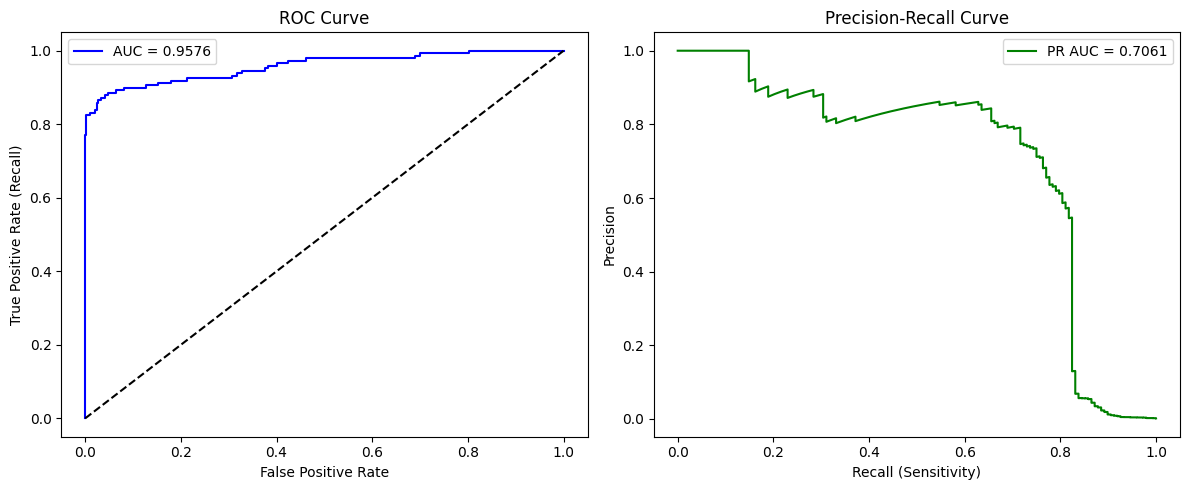

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

##  ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob_lr)
roc_auc = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()

##  Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob_lr)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'PR AUC = {pr_auc:.4f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()


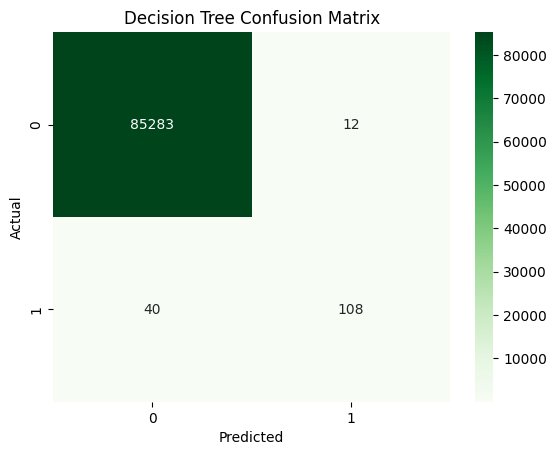

              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     85295
           1     0.9000    0.7297    0.8060       148

    accuracy                         0.9994     85443
   macro avg     0.9498    0.8648    0.9028     85443
weighted avg     0.9994    0.9994    0.9994     85443

Decision Tree ROC-AUC Score: 0.8614


In [ ]:
# Trying DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_dt, digits=4))

# ROC-AUC
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print(f"Decision Tree ROC-AUC Score: {roc_auc_dt:.4f}")


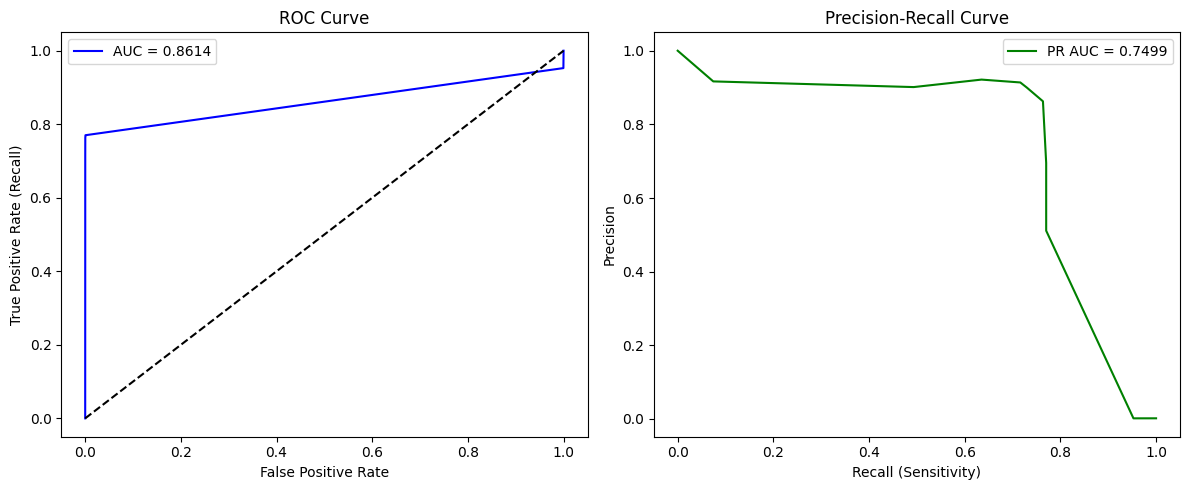

In [ ]:
##  ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob_dt)
roc_auc = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()

## --- Precision-Recall Curve ---
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob_dt)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'PR AUC = {pr_auc:.4f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Using SMOTE to handle highly imbalanced data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

unique, counts = np.unique(y_train_sm, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(199020), np.int64(1): np.int64(199020)}


In [ ]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sm, y_train_sm)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

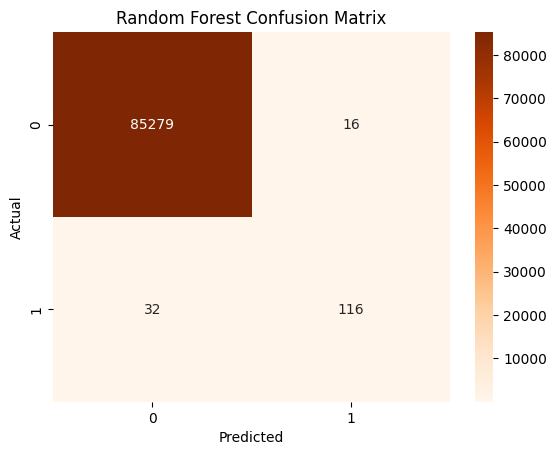

              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8788    0.7838    0.8286       148

    accuracy                         0.9994     85443
   macro avg     0.9392    0.8918    0.9141     85443
weighted avg     0.9994    0.9994    0.9994     85443

Random Forest ROC-AUC Score: 0.9587


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rf, digits=4))

# ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")

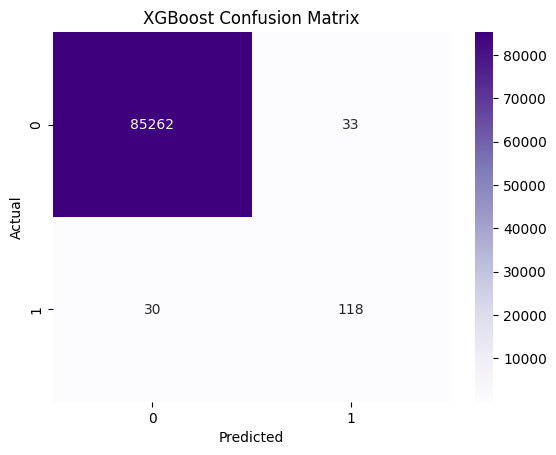

              precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     85295
           1     0.7815    0.7973    0.7893       148

    accuracy                         0.9993     85443
   macro avg     0.8906    0.8985    0.8945     85443
weighted avg     0.9993    0.9993    0.9993     85443

XGBoost ROC-AUC Score: 0.9733


In [ ]:
# Tring XGboost classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluation
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_xgb, digits=4))
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.4f}")

In [ ]:
# Threshold tuning
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for t in thresholds:
    y_pred_thresh = (y_prob_xgb >= t).astype(int)
    print(f"Threshold: {t}")
    print(classification_report(y_test, y_pred_thresh, digits=4))


Threshold: 0.3
              precision    recall  f1-score   support

           0     0.9997    0.9994    0.9995     85295
           1     0.6954    0.8176    0.7516       148

    accuracy                         0.9991     85443
   macro avg     0.8475    0.9085    0.8755     85443
weighted avg     0.9992    0.9991    0.9991     85443

Threshold: 0.4
              precision    recall  f1-score   support

           0     0.9996    0.9995    0.9996     85295
           1     0.7284    0.7973    0.7613       148

    accuracy                         0.9991     85443
   macro avg     0.8640    0.8984    0.8804     85443
weighted avg     0.9992    0.9991    0.9992     85443

Threshold: 0.5
              precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     85295
           1     0.7815    0.7973    0.7893       148

    accuracy                         0.9993     85443
   macro avg     0.8906    0.8985    0.8945     85443
weighted avg     0.9993    0.

In [ ]:
# Hyper-parameter tuning for xgboost
calculated_weight = len(y_train_sm[y_train_sm == 0]) / len(y_train_sm[y_train_sm == 1])
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'scale_pos_weight': [calculated_weight, calculated_weight * 0.5, calculated_weight * 1.5]
}
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    scoring='f1',
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1
)

search.fit(X_train_sm, y_train_sm)

print("Best Parameters Found:", search.best_params_)

best_xgb = search.best_estimator_

y_prob_best = best_xgb.predict_proba(X_test)[:, 1]

# Explore thresholds as before
thresholds = [0.5, 0.6, 0.7]

for t in thresholds:
    y_pred_thresh = (y_prob_best >= t).astype(int)
    print(f"Threshold: {t}")
    print(classification_report(y_test, y_pred_thresh, digits=4))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:37:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters Found: {'subsample': 0.7, 'scale_pos_weight': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Threshold: 0.5
              precision    recall  f1-score   support

           0     0.9997    0.9994    0.9995     85295
           1     0.6936    0.8108    0.7477       148

    accuracy                         0.9991     85443
   macro avg     0.8467    0.9051    0.8736     85443
weighted avg     0.9991    0.9991    0.9991     85443

Threshold: 0.6
              precision    recall  f1-score   support

           0     0.9996    0.9995    0.9996     85295
           1     0.7421    0.7973    0.7687       148

    accuracy                         0.9992     85443
   macro avg     0.8709    0.8984    0.8842     85443
weighted avg     0.9992    0.9992    0.9992     85443

Threshold: 0.7
              precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     85295
           1     0.7959    0.7905    0.79

In [ ]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.4 MB/s eta 0:00:00


In [ ]:
# Trying combination of xgboost, catboost and lightBGM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

scale_pos_weight = len(y_train_sm[y_train_sm == 0]) / len(y_train_sm[y_train_sm == 1])

#  XGBoost
xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train_sm, y_train_sm)

# LightGBM
lgbm = LGBMClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
lgbm.fit(X_train_sm, y_train_sm)

# CatBoost
cat = CatBoostClassifier(
    scale_pos_weight=scale_pos_weight,
    random_seed=42,
    verbose=False
)
cat.fit(X_train_sm, y_train_sm)


from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('cat', cat)
    ],
    voting='soft',
    n_jobs=-1
)

ensemble.fit(X_train_sm, y_train_sm)


from sklearn.metrics import classification_report, roc_auc_score

y_prob_ens = ensemble.predict_proba(X_test)[:, 1]

# Test different thresholds
thresholds = [0.5, 0.6, 0.7]

for t in thresholds:
    y_pred_thresh = (y_prob_ens >= t).astype(int)
    print(f"Threshold: {t}")
    print(classification_report(y_test, y_pred_thresh, digits=4))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_ens):.4f}\n")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:38:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Threshold: 0.5
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     85295
           1     0.7378    0.8176    0.7756       148

    accuracy                         0.9992     85443
   macro avg     0.8687    0.9085    0.8876     85443
weighted avg     0.9992    0.9992    0.9992     85443

ROC-AUC: 0.9725

Threshold: 0.6
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     85295
           1     0.8067    0.8176    0.8121       148

    accuracy        

After installing `catboost`, you can run the previous cell again to build and evaluate the ensemble model.

In [ ]:
import joblib
joblib.dump(ensemble, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']

In [ ]:
test_sample = X_test[:5]
import pandas as pd
temp = pd.DataFrame(test_sample)
temp.to_csv("test_data.csv", index=False)

In [ ]:
pip install shap

In [ ]:
X_sample = temp.copy()

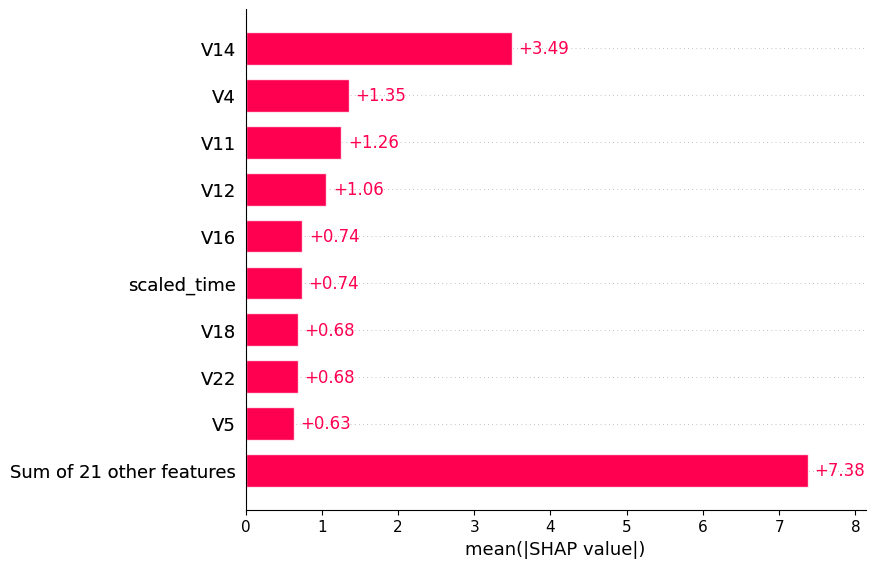

In [ ]:
import shap
# For XGBoost
explainer = shap.Explainer(ensemble.named_estimators_['xgb'])
shap_values = explainer(X_sample)
shap.plots.bar(shap_values)

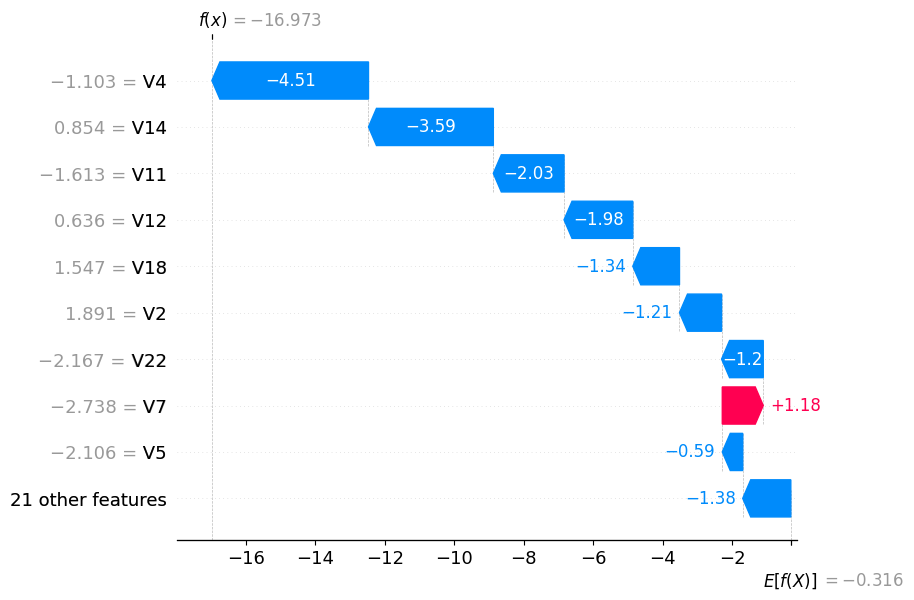

In [ ]:
shap.plots.waterfall(shap_values[0])